<a href="https://colab.research.google.com/github/geoburdin/fools_gold/blob/main/gold_pyrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, we need to have a dataset. The fastest way to get one is found something ready from Kaggle. Load kaggle.json and unzip the folder with the source images


In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d egorgeorgiy/pyrite-gold
!unzip pyrite-gold.zip

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              224KB  2021-04-24 17:07:26           3665  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           2118  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            444  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1360  
mathurinache/twitter-edge-nodes           

Now it makes sense to augment the data, because we don't have that many pictures
Let's use ImageDataGenerator from tensorflow


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2, rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip = True) 


train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/images',
                                                 shuffle=True,
                                                 target_size=(512, 512), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_generator = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/images',
                                                 shuffle=True,
                                                 target_size=(512, 512), 
                                                 subset="training",
                                                 class_mode='categorical')


Found 290 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


We add layers to the neural network. Very variable thing, google xception, VGG, Resnet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([                 
  layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(512, 512, 3)),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(256, (3,3), padding='same', activation='relu'),
  layers.AveragePooling2D(pool_size=(2,2), strides = (2,2)),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
  layers.AveragePooling2D(pool_size=(2,2), strides = (2,2)),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
  layers.AveragePooling2D(pool_size=(2,2), strides = (2,2)),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(512, 512, 3)),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation = 'sigmoid')

])

  
model.compile(loss='binary_crossentropy',
  optimizer='adam', metrics=['accuracy'])  

Training

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4) 

history = model.fit(
    train_dataset,
    epochs=50,
    batch_size = 32,
    validation_data=validation_generator,
    callbacks=[callback],
    verbose = 1
)

Epoch 1/100
10/10 [==============================] - 32s 4s/step - loss: 0.3936 - accuracy: 0.8690 - val_loss: 0.3747 - val_accuracy: 0.8586
Epoch 2/100
10/10 [==============================] - 31s 3s/step - loss: 0.3427 - accuracy: 0.8621 - val_loss: 0.4093 - val_accuracy: 0.8690
Epoch 3/100
10/10 [==============================] - 31s 3s/step - loss: 0.3302 - accuracy: 0.8931 - val_loss: 0.2844 - val_accuracy: 0.8793
Epoch 4/100
10/10 [==============================] - 31s 3s/step - loss: 0.3406 - accuracy: 0.8621 - val_loss: 0.3108 - val_accuracy: 0.8931
Epoch 5/100
10/10 [==============================] - 31s 3s/step - loss: 0.3180 - accuracy: 0.8897 - val_loss: 0.2535 - val_accuracy: 0.8931
Epoch 6/100
10/10 [==============================] - 31s 3s/step - loss: 0.2873 - accuracy: 0.8793 - val_loss: 0.3052 - val_accuracy: 0.8655
Epoch 7/100
10/10 [==============================] - 30s 3s/step - loss: 0.3051 - accuracy: 0.8655 - val_loss: 0.2545 - val_accuracy: 0.9034
Epoch 8/100
1

In [ ]:
#saving, don't forget because google colab won't automatically save
model.save('model.h5')
model.save_weights('model_weights.h5')


Now testing on a test dataset, let's load new images

In [ ]:
from google.colab import files

files.upload()
! unzip downloads.zip

Saving downloads.zip to downloads.zip
Archive:  downloads.zip
   creating: downloads/
   creating: downloads/gold/
  inflating: downloads/gold/300.jpeg  
  inflating: downloads/gold/301.jpeg  
  inflating: downloads/gold/302.jpeg  
  inflating: downloads/gold/303.jpeg  
  inflating: downloads/gold/304.jpeg  
  inflating: downloads/gold/305.jpeg  
  inflating: downloads/gold/306.jpeg  
  inflating: downloads/gold/307.jpeg  
  inflating: downloads/gold/308.jpeg  
  inflating: downloads/gold/309.jpeg  
  inflating: downloads/gold/310.jpeg  
  inflating: downloads/gold/311.jpeg  
  inflating: downloads/gold/312.jpeg  
  inflating: downloads/gold/313.jpeg  
  inflating: downloads/gold/314.jpeg  
  inflating: downloads/gold/315.jpeg  
  inflating: downloads/gold/316.jpeg  
  inflating: downloads/gold/317.jpeg  
  inflating: downloads/gold/318.jpeg  
  inflating: downloads/gold/319.jpeg  
  inflating: downloads/gold/320.jpeg  
  inflating: downloads/gold/321.jpeg  
  inflating: downloads/gold

Load the saved model as if we hadn't just trained it, but use it somewhere else and evaluate the accuracy of the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


image_generator = ImageDataGenerator(rescale=1.0/255.0, rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip = True) 

x_test = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/downloads',
                                                 shuffle=True,
                                                 target_size=(512, 512), 
                                                 subset="training",
                                                 class_mode='categorical')

model = load_model('/content/model.h5')
results = model.evaluate(x_test, batch_size=32)
print("test loss, test acc:", results)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
2/2 [==============================] - 32s 367ms/step - loss: 0.3081 - accuracy: 0.9000
test loss, test acc: [0.3080773949623108, 0.8999999761581421]


Not bad
Now let's try to make a prediction of a particular image

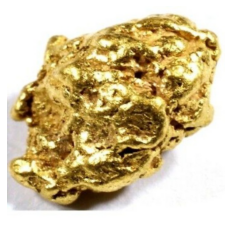

[[0.87241346 0.13576671]]
gold


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(512, 512))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor

img = '/content/downloads/gold/324.jpeg'
new_image = load_image(img, True)


pred = model.predict(new_image)
print(pred)
if pred[0][0] > 0.5:
    prediction = 'gold'
else:
    prediction = 'pyrite'
print(prediction)